___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\19 - Supervised Learning Capstone Project Cohort Analysis and Tree Based Methods\\180 - Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
# CODE HERE
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
# CODE HERE
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

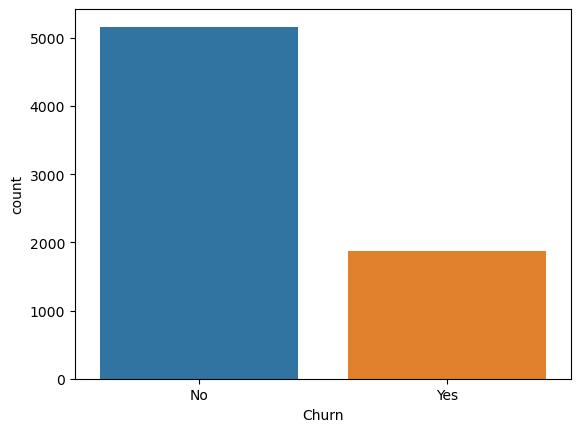

In [7]:
# CODE HERE
sns.countplot(data=df,x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

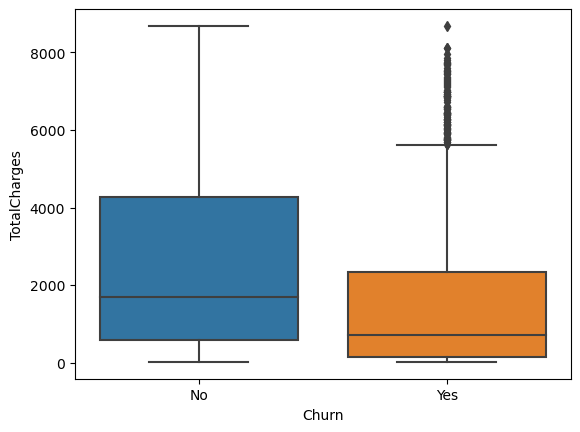

In [8]:
# CODE HERE
sns.boxplot(data=df,y='TotalCharges',x="Churn")

In [9]:
df[df['Churn']=="Yes"]['TotalCharges'].max()

8684.8

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

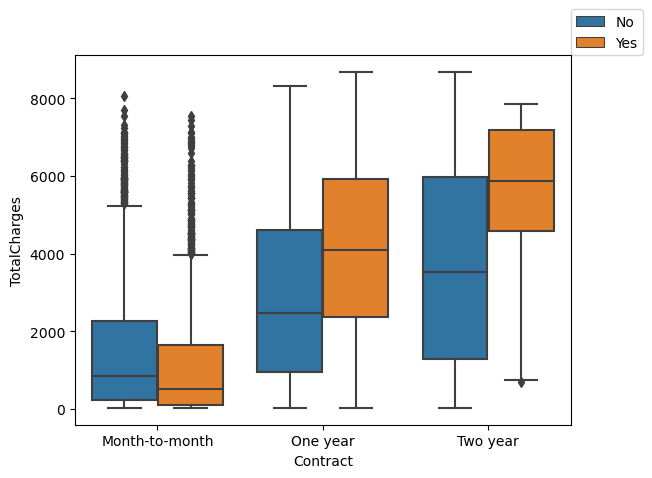

In [10]:
#CODE HERE
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue="Churn")
plt.legend(loc=(1,1))

In [11]:
help(df.corr())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 | 

C:\Users\HP\AppData\Local\Temp\ipykernel_12040\1199645102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  help(df.corr())


<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [12]:
#CODE HERE
temp=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]
temp


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,No,Yes,No,No,DSL,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,DSL,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,Yes,Yes,No,No,DSL,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,Yes,No,Yes,Yes,DSL,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,DSL,Yes,Yes,One year,Yes,Mailed check,No
7028,Female,0,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Fiber optic,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,Female,0,Yes,Yes,No,No phone service,Yes,No,No,No,DSL,No,No,Month-to-month,Yes,Electronic check,No
7030,Male,1,Yes,No,Yes,Yes,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Mailed check,Yes


In [13]:
temp=pd.get_dummies(temp,drop_first=False)

temp

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [14]:
temp2=temp.corr()['Churn_Yes'].sort_values()

In [15]:
temp2.index

Index(['Churn_No', 'Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_

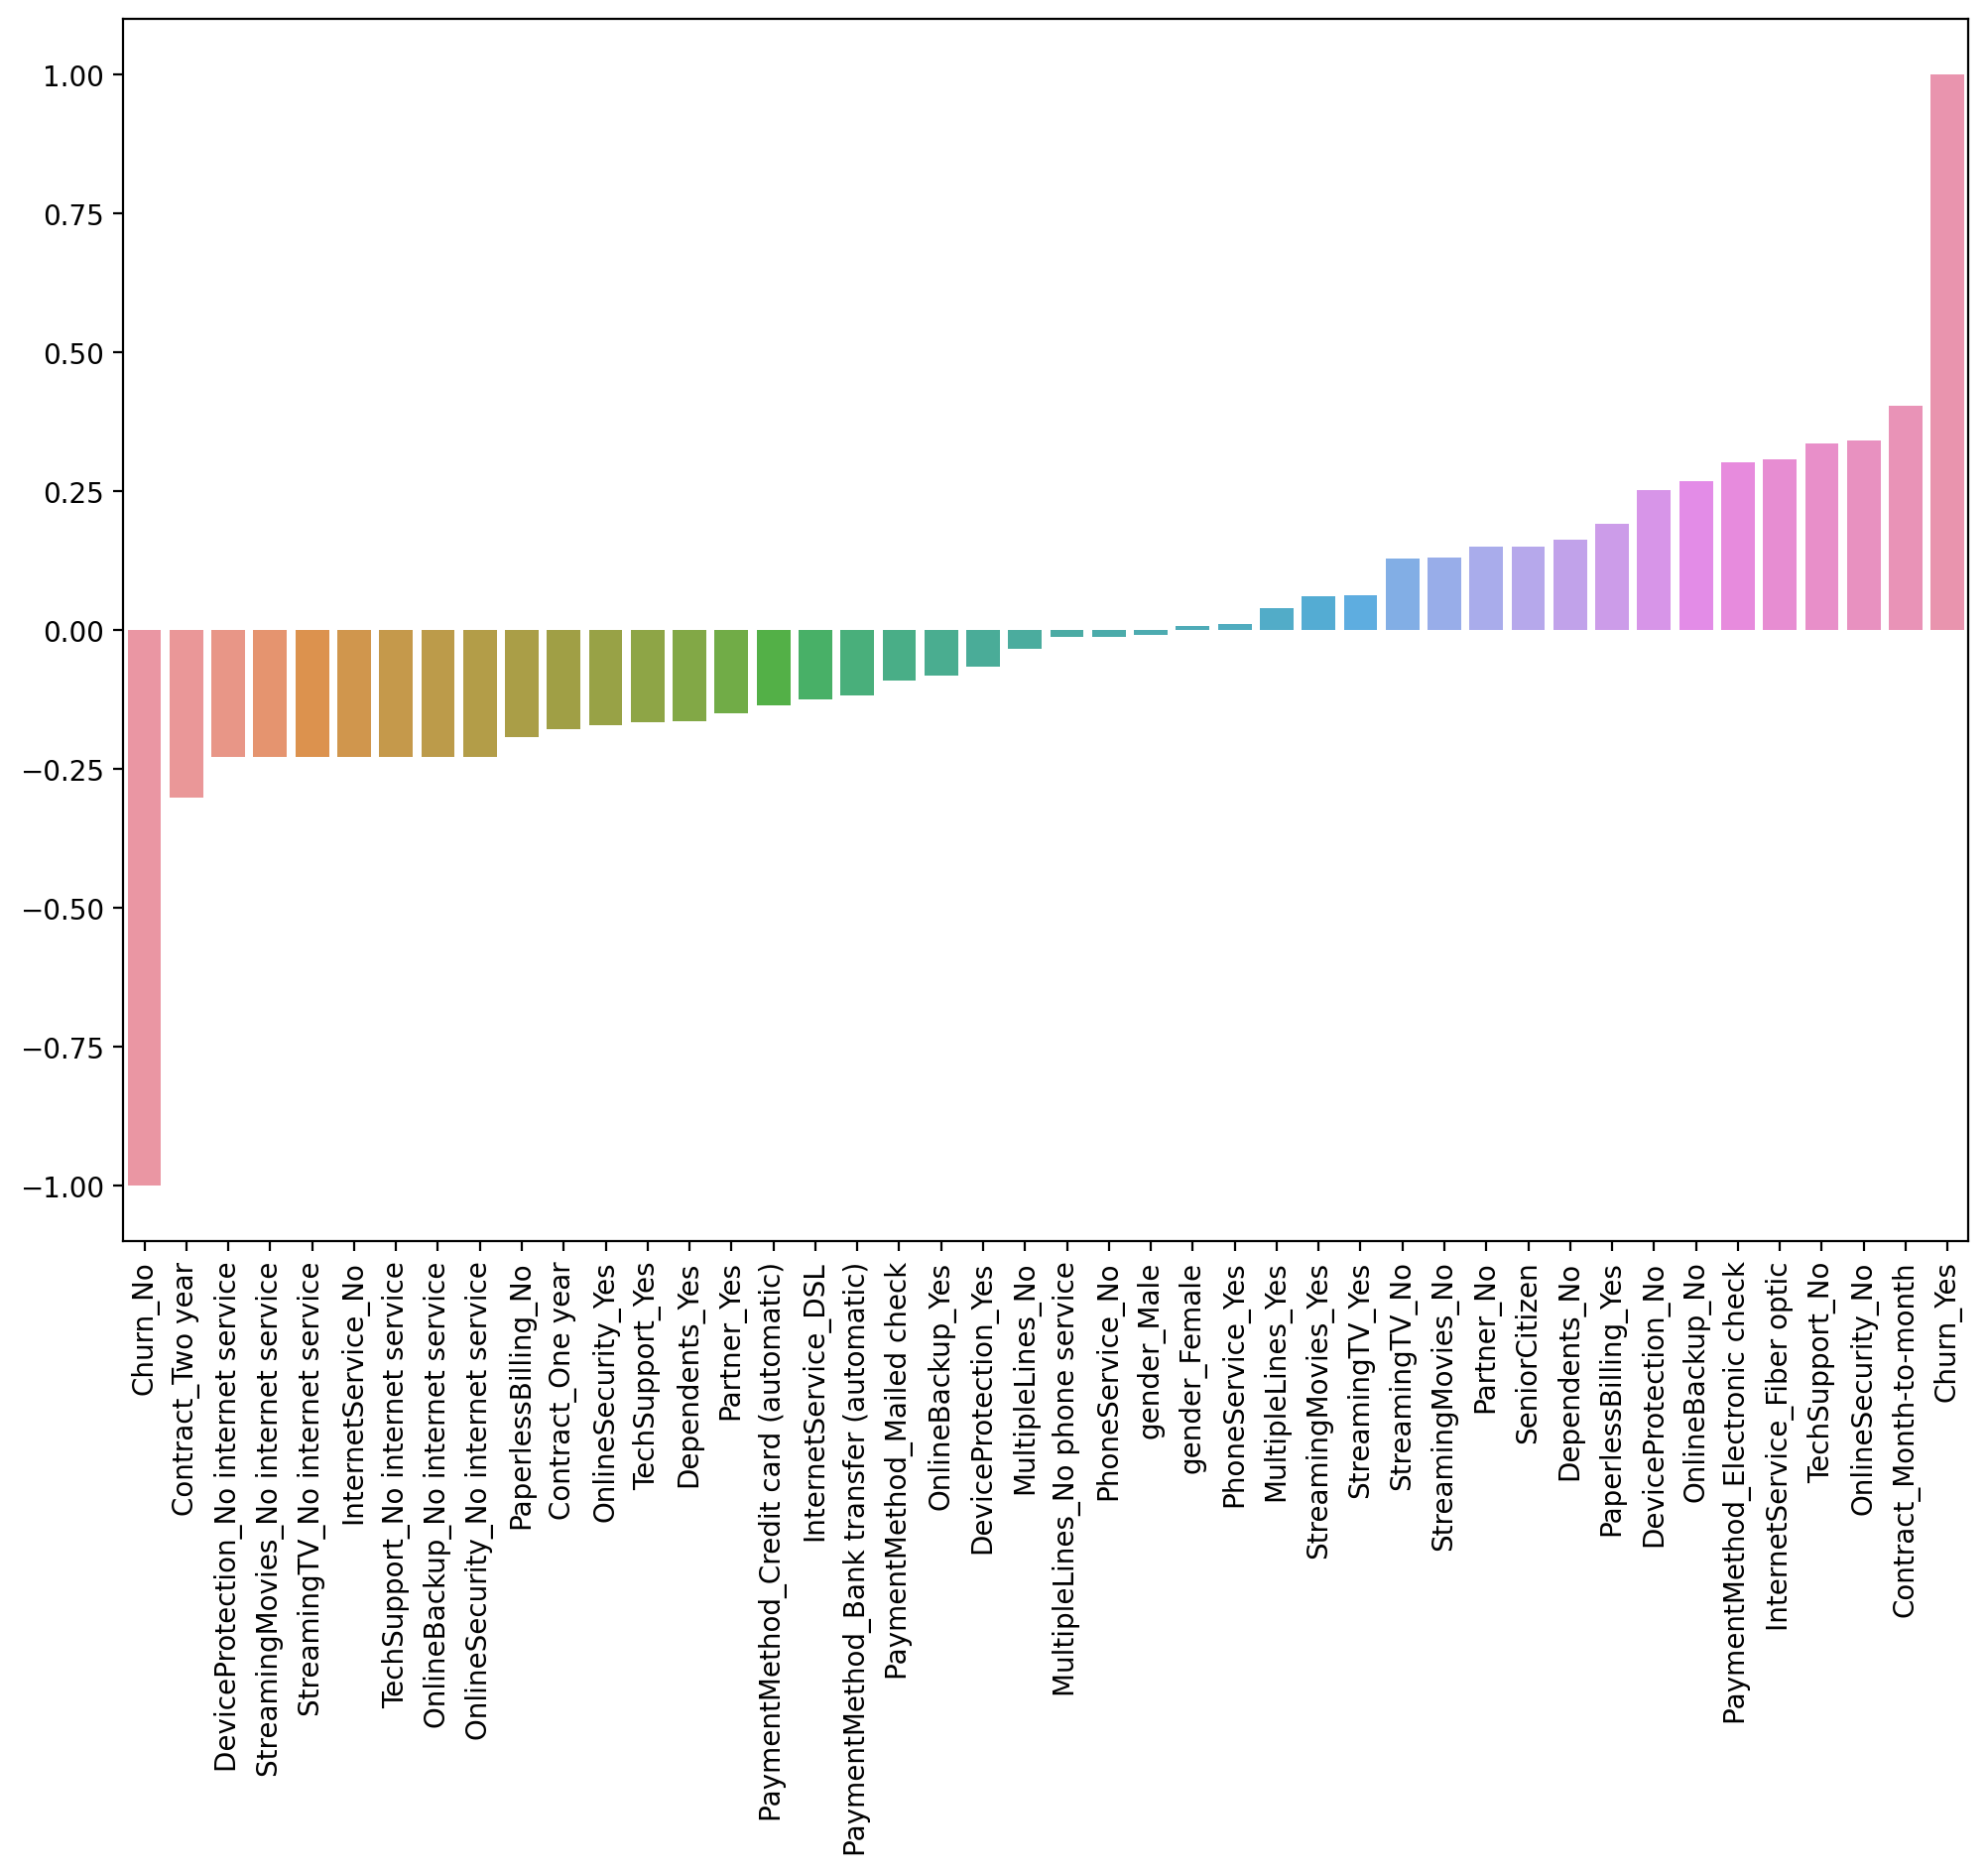

In [16]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=temp2.index,y=temp2.values)
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [17]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

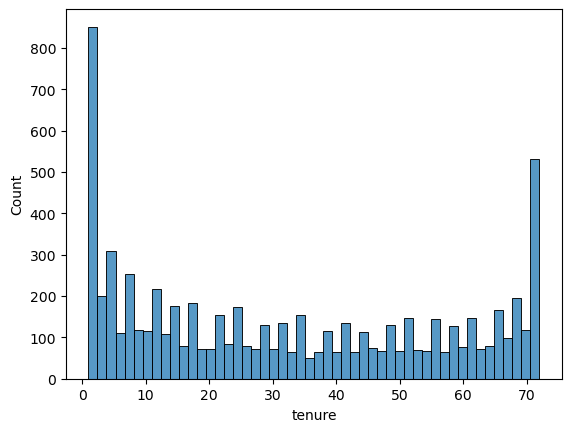

In [18]:
#CODE HERE
sns.histplot(data=df,x='tenure',bins=50)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

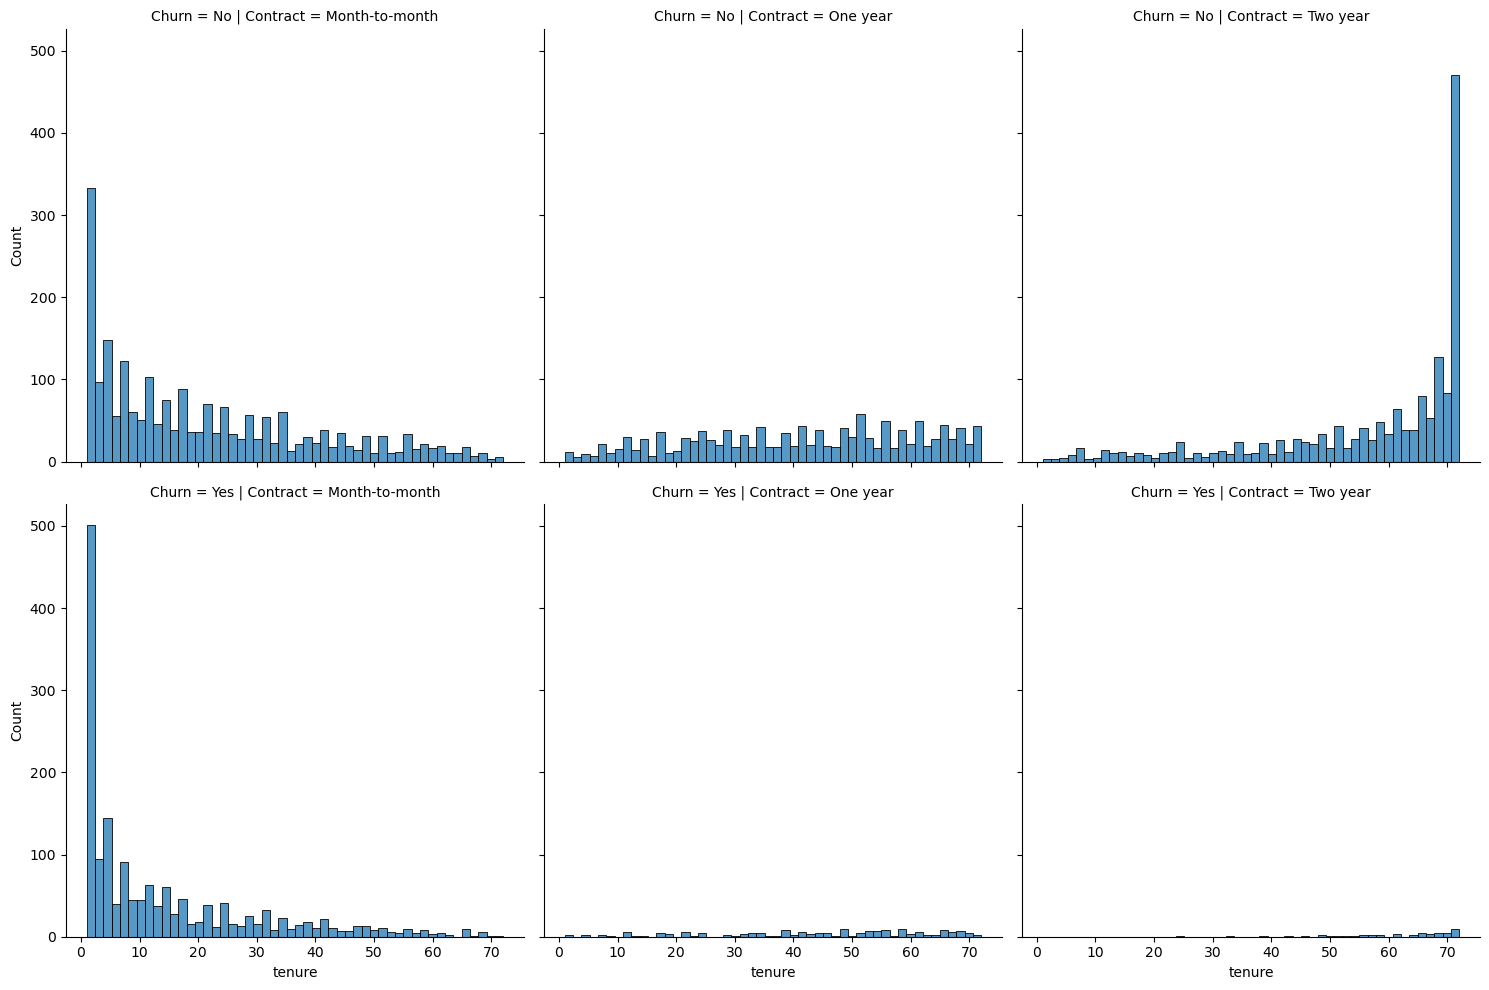

In [19]:
#CODE HERE
sns.displot(kind='hist',data=df,row='Churn',col='Contract',x='tenure',bins=50)

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

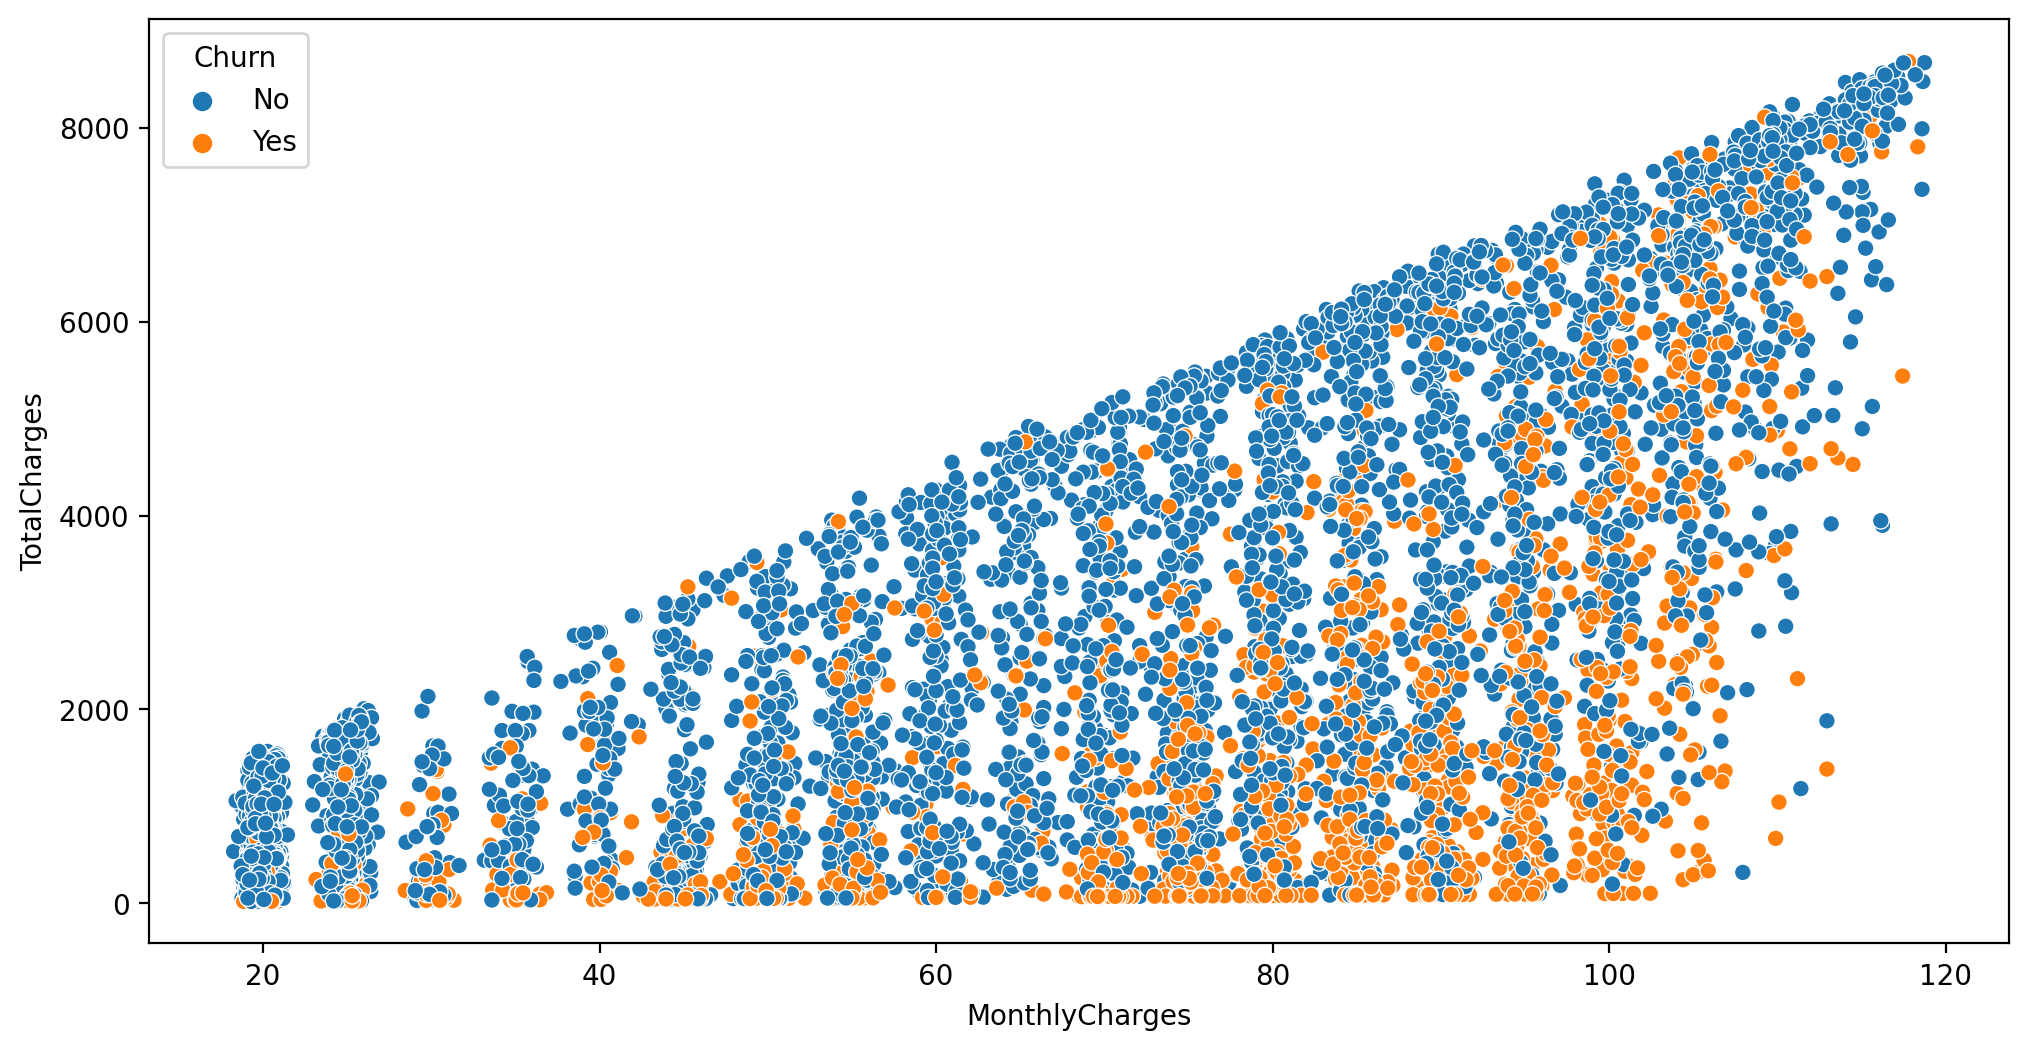

In [20]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=200)

sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [21]:
#CODE HERE
yes=df.groupby(['Churn','tenure']).count().transpose()['Yes']
no=df.groupby(['Churn','tenure']).count().transpose()['No']


In [22]:
tenure=(100*yes/(yes+no)).iloc[0]

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

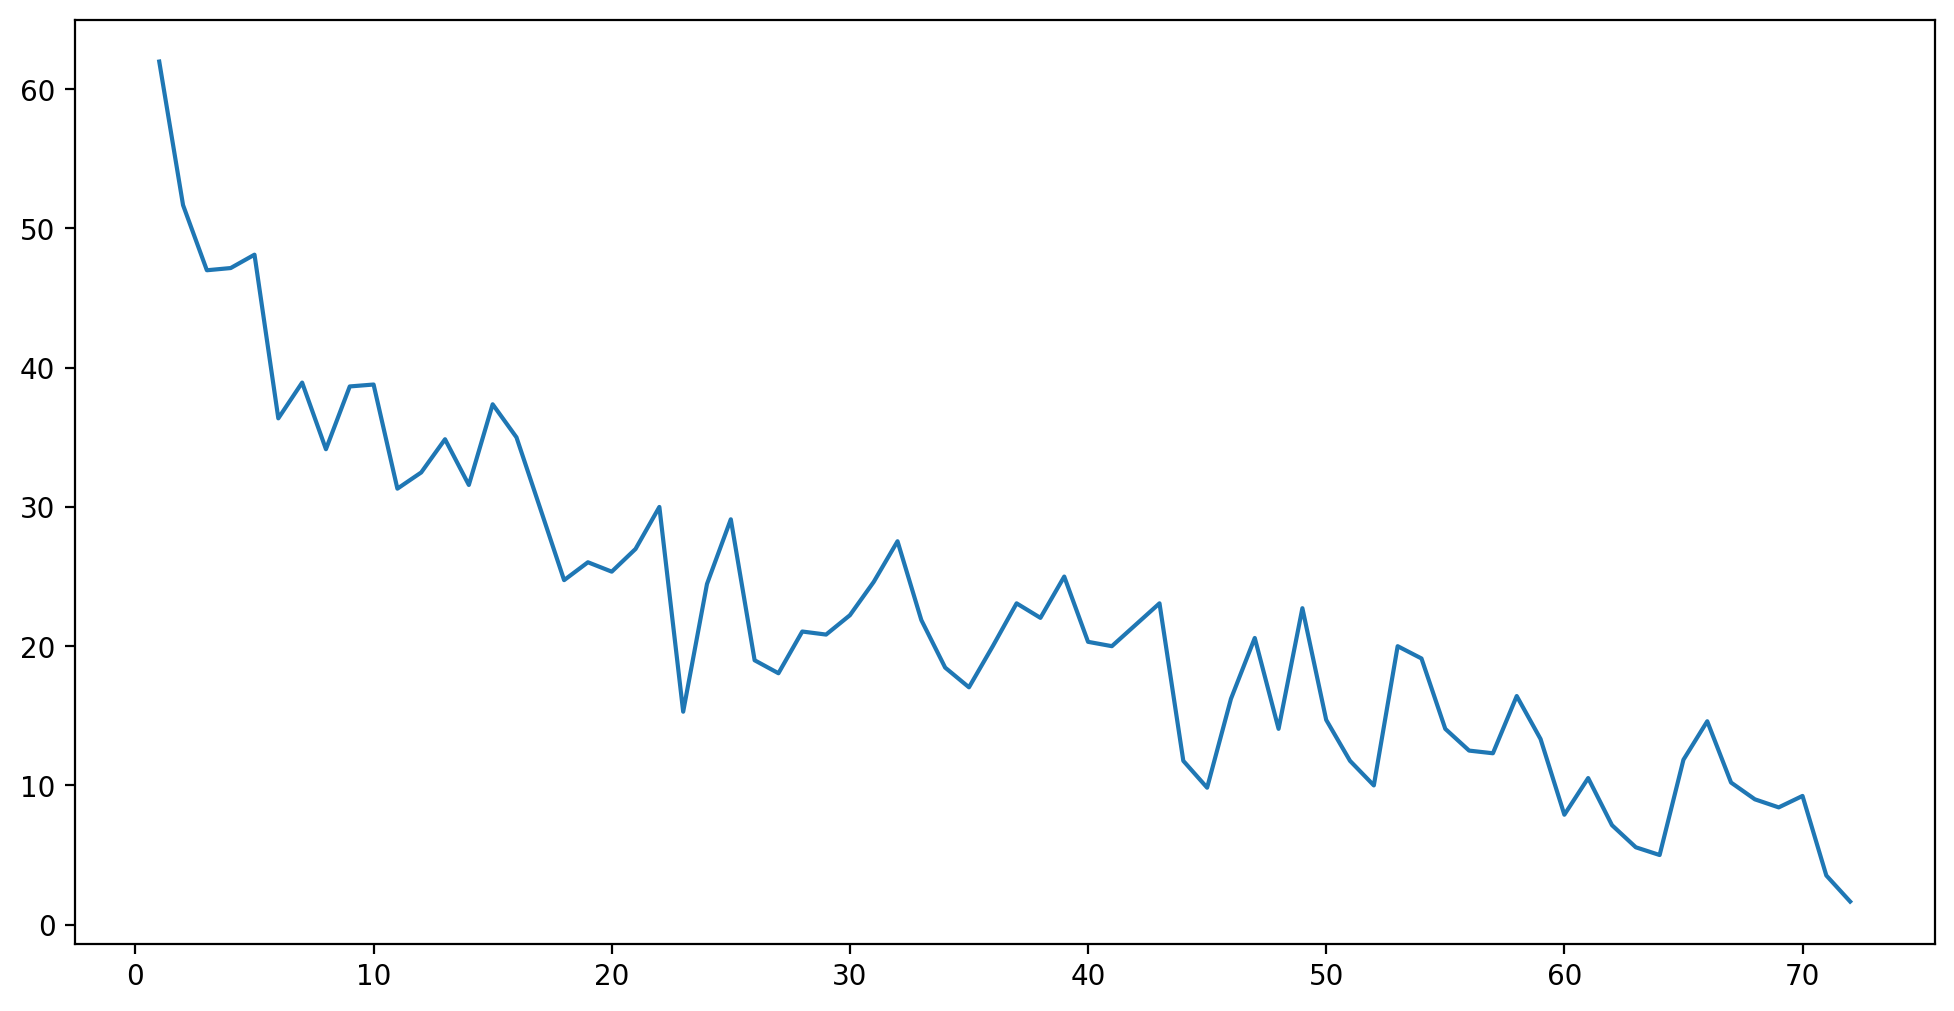

In [23]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=200)

plt.plot(tenure.index,tenure.values)

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [24]:
# CODE HERE
df['Tenure Cohort']=df['tenure']

In [25]:
def func(col):
    if col<=12:
        return '0-12 Months'
    elif col<=24:
        return '12-24 Months'
    elif col<=48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [26]:
df['Tenure Cohort']=df['Tenure Cohort'].apply(func)

In [27]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

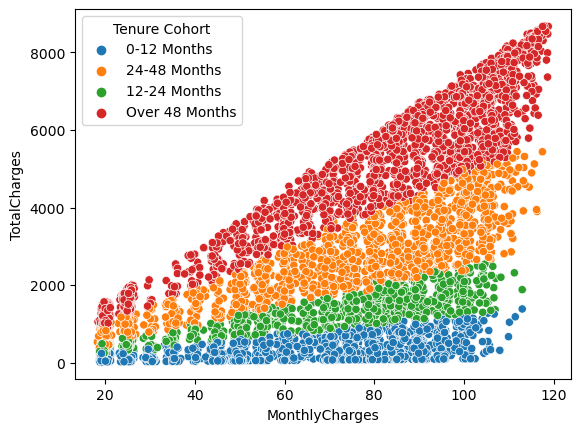

In [28]:
#CODE HERE
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Tenure Cohort')

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

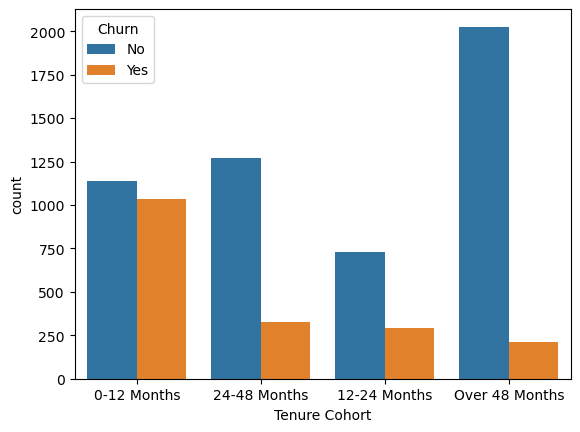

In [29]:
# CODE HERE
sns.countplot(x=df['Tenure Cohort'],hue=df['Churn'])

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

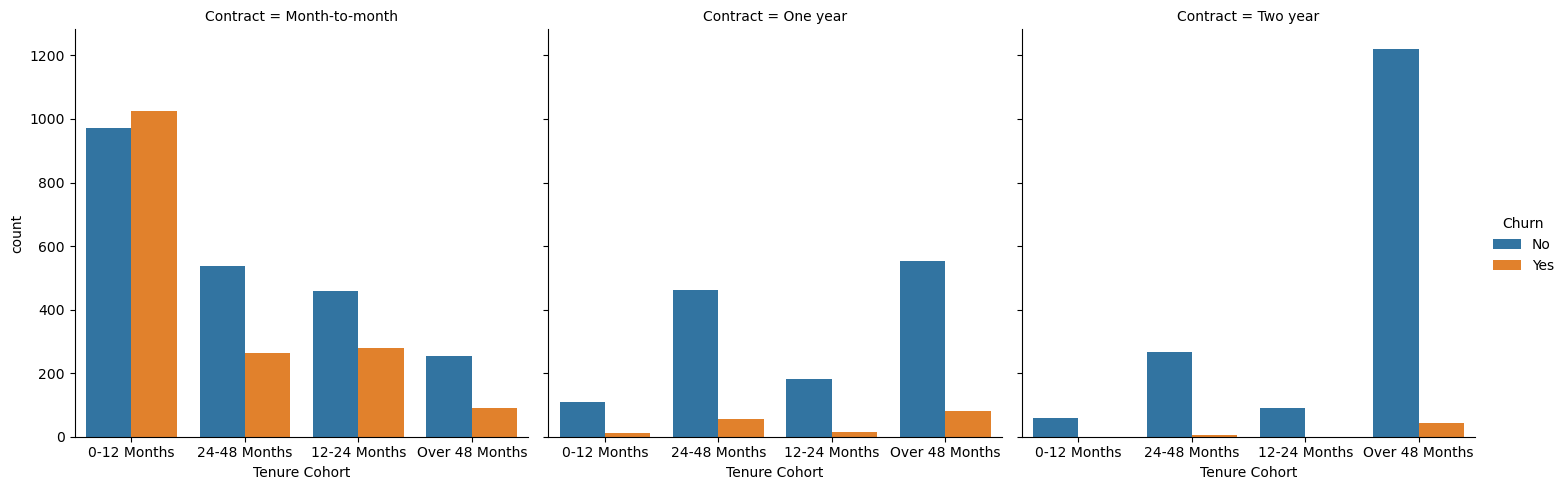

In [30]:
#CODE HERE
sns.catplot(data=df,kind='count',x='Tenure Cohort',hue='Churn',col='Contract')

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [96]:
#CODE HERE
X=df.drop(['customerID'],axis=1)

In [97]:
X=X.drop('Churn',axis=1)

In [98]:
X=pd.get_dummies(X,drop_first=True)

In [99]:
y=df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [100]:
#CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [117]:
from sklearn.tree import DecisionTreeClassifier
base_tree=DecisionTreeClassifier(max_depth=6)
base_tree.fit(X_train,y_train)
preds=base_tree.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       572
         Yes       0.49      0.55      0.52       132

    accuracy                           0.81       704
   macro avg       0.69      0.71      0.70       704
weighted avg       0.82      0.81      0.81       704



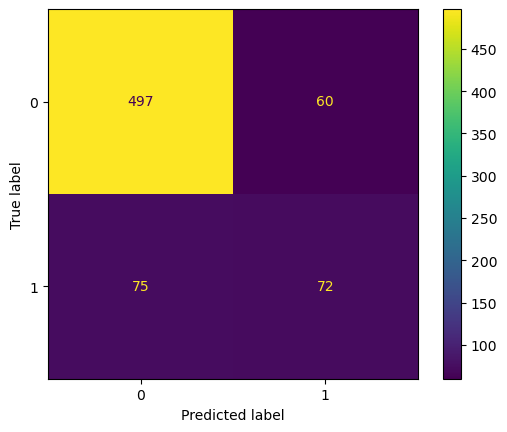

In [118]:
cm=confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()


In [103]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 Months', 'Tenure Cohort_24-48 Months',
       'Tenure Cohort_Over 48 Months'],
      dtype='object')

In [119]:
base_tree.feature_importances_


array([0.01082504, 0.42391407, 0.04492202, 0.0653611 , 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.02628952, 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [120]:
len(base_tree.feature_importances_)


33

In [121]:
imp_feats=pd.DataFrame(index=X.columns,data=base_tree.feature_importances_,columns=['Importances'])

In [122]:
imp_feats

,Importances
SeniorCitizen,0.010825
tenure,0.423914
MonthlyCharges,0.044922
TotalCharges,0.065361
gender_Male,0.001237
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.007852
MultipleLines_No phone service,0.000000
MultipleLines_Yes,0.012432


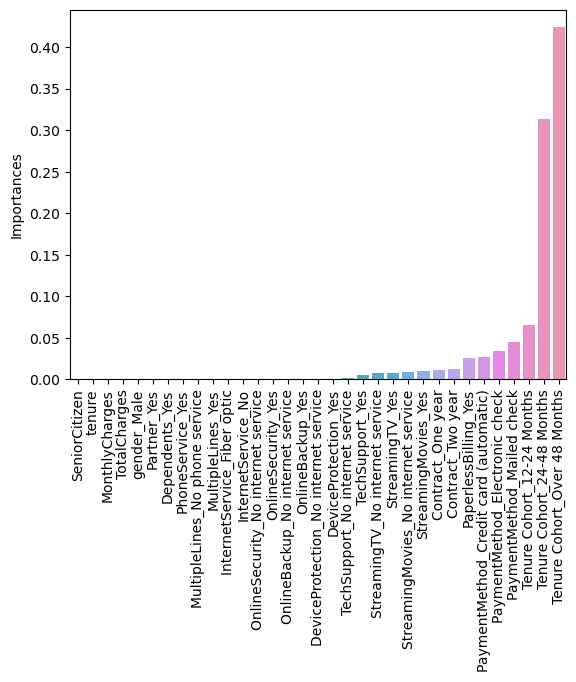

In [123]:
sns.barplot(x=imp_feats.index,y=imp_feats['Importances'].sort_values())
plt.xticks(rotation=90);

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [124]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

          No       0.89      0.86      0.87       573
         Yes       0.46      0.52      0.49       131

    accuracy                           0.80       704
   macro avg       0.67      0.69      0.68       704
weighted avg       0.81      0.80      0.80       704



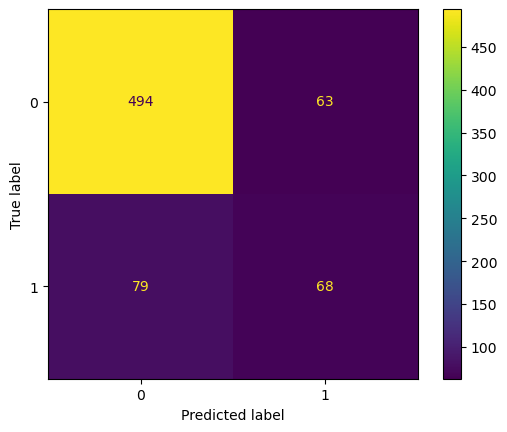

In [125]:
cm=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(cm).plot()


## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [156]:
#CODE HERE

from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
preds=abc.predict(X_test)

In [157]:
abc.feature_importances_.argmax()

3

In [158]:
X.columns[1]

'tenure'

In [159]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89       571
         Yes       0.54      0.60      0.57       133

    accuracy                           0.83       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704



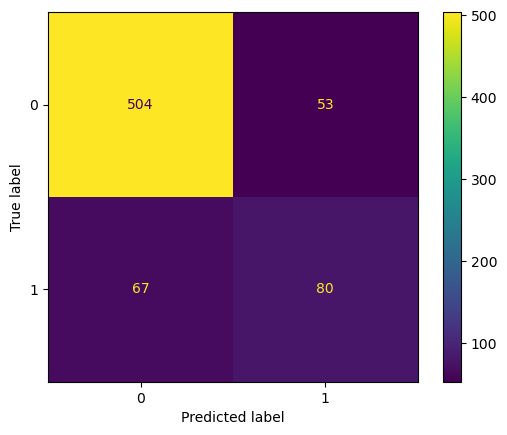

In [160]:
cm=confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()

**TASK: Analyze your results, which model performed best for you?**

In [116]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!